<a href="https://colab.research.google.com/github/AabidMK/RealtyAI_Infosys_Internship_Aug2025/blob/Sarayu-Narra/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/State_time_series.csv.zip')
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df['Date'].dtype)
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

object
datetime64[ns]


In [ ]:
df_mv = df[['Date', 'RegionName', 'ZHVI_AllHomes']].copy()
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes
0,1996-04-30,Alabama,79500.0
1,1996-04-30,Arizona,103600.0
2,1996-04-30,Arkansas,64400.0
3,1996-04-30,California,157900.0
4,1996-04-30,Colorado,128100.0


In [ ]:
print("Missing values before handling:")
print(df_mv.isnull().sum())
df_mv['ZHVI_AllHomes'] = df_mv['ZHVI_AllHomes'].ffill()
print("\nMissing values after handling:")
print(df_mv.isnull().sum())

Missing values before handling:
Date               0
RegionName         0
ZHVI_AllHomes    774
dtype: int64

Missing values after handling:
Date             0
RegionName       0
ZHVI_AllHomes    0
dtype: int64


In [ ]:
df_mv = df_mv.sort_values(by=['RegionName', 'Date'])
df_mv['Rolling_Median_ZHVI'] = df_mv.groupby('RegionName')['ZHVI_AllHomes'].transform(lambda x: x.rolling(window=3, center=True).median())
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes,Rolling_Median_ZHVI
0,1996-04-30,Alabama,79500.0,NaN
44,1996-05-31,Alabama,79200.0,79500.0
90,1996-06-30,Alabama,79500.0,79500.0
136,1996-07-31,Alabama,79700.0,79700.0
182,1996-08-31,Alabama,79700.0,79700.0


In [ ]:
df_mv = df_mv.sort_values(by=['RegionName', 'Date'])
df_mv['Rolling_Median_ZHVI'] = df_mv.groupby('RegionName')['ZHVI_AllHomes'].transform(lambda x: x.rolling(window=3, center=True).median())

outlier_threshold = 0.10
is_outlier = (df_mv['ZHVI_AllHomes'] - df_mv['Rolling_Median_ZHVI']).abs() > (outlier_threshold * df_mv['Rolling_Median_ZHVI'].abs())
df_mv['ZHVI_AllHomes'] = df_mv['ZHVI_AllHomes'].where(~is_outlier, df_mv['Rolling_Median_ZHVI'])
df_mv['Rolling_Median_ZHVI'] = df_mv['Rolling_Median_ZHVI'].fillna(df_mv['ZHVI_AllHomes'])
display(df_mv.head())

,Date,RegionName,ZHVI_AllHomes,Rolling_Median_ZHVI
0,1996-04-30,Alabama,79500.0,79500.0
44,1996-05-31,Alabama,79200.0,79500.0
90,1996-06-30,Alabama,79500.0,79500.0
136,1996-07-31,Alabama,79700.0,79700.0
182,1996-08-31,Alabama,79700.0,79700.0


In [ ]:
unique_regions = df_mv['RegionName'].unique().tolist()
print(unique_regions)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'DistrictofColumbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'NorthDakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'Tennessee', 'Texas', 'UnitedStates', 'Utah', 'Vermont', 'Virginia', 'Washington', 'WestVirginia', 'Wisconsin', 'Wyoming']


In [ ]:
for region in unique_regions:
    print(f"Processing region: {region}")

Processing region: Alabama
Processing region: Alaska
Processing region: Arizona
Processing region: Arkansas
Processing region: California
Processing region: Colorado
Processing region: Connecticut
Processing region: Delaware
Processing region: DistrictofColumbia
Processing region: Florida
Processing region: Georgia
Processing region: Hawaii
Processing region: Idaho
Processing region: Illinois
Processing region: Indiana
Processing region: Iowa
Processing region: Kansas
Processing region: Kentucky
Processing region: Louisiana
Processing region: Maine
Processing region: Maryland
Processing region: Massachusetts
Processing region: Michigan
Processing region: Minnesota
Processing region: Mississippi
Processing region: Missouri
Processing region: Montana
Processing region: Nebraska
Processing region: Nevada
Processing region: NewHampshire
Processing region: NewJersey
Processing region: NewMexico
Processing region: NewYork
Processing region: NorthCarolina
Processing region: NorthDakota
Proces

In [ ]:
for region in unique_regions:
    print(f"Processing region: {region}")
    region_df = df_mv[df_mv['RegionName'] == region][['Date', 'ZHVI_AllHomes']].copy()
    region_df = region_df.rename(columns={'Date': 'ds', 'ZHVI_AllHomes': 'y'})
    display(region_df.head())

Processing region: Alabama


,ds,y
0,1996-04-30,79500.0
44,1996-05-31,79200.0
90,1996-06-30,79500.0
136,1996-07-31,79700.0
182,1996-08-31,79700.0


Processing region: Alaska


,ds,y
781,1997-09-30,81700.0
828,1997-10-31,81800.0
875,1997-11-30,81900.0
922,1997-12-31,82400.0
969,1998-01-31,82900.0


Processing region: Arizona


,ds,y
1,1996-04-30,103600.0
45,1996-05-31,103900.0
91,1996-06-30,104100.0
137,1996-07-31,104400.0
183,1996-08-31,104600.0


Processing region: Arkansas


,ds,y
2,1996-04-30,64400.0
46,1996-05-31,64400.0
92,1996-06-30,64400.0
138,1996-07-31,64300.0
184,1996-08-31,64100.0


Processing region: California


,ds,y
3,1996-04-30,157900.0
47,1996-05-31,157800.0
93,1996-06-30,157500.0
139,1996-07-31,157300.0
185,1996-08-31,157000.0


Processing region: Colorado


,ds,y
4,1996-04-30,128100.0
48,1996-05-31,128400.0
94,1996-06-30,128700.0
140,1996-07-31,128900.0
186,1996-08-31,129300.0


Processing region: Connecticut


,ds,y
5,1996-04-30,132000.0
49,1996-05-31,132400.0
95,1996-06-30,132700.0
141,1996-07-31,132900.0
187,1996-08-31,133100.0


Processing region: Delaware


,ds,y
6,1996-04-30,106800.0
50,1996-05-31,107200.0
96,1996-06-30,107500.0
142,1996-07-31,108000.0
188,1996-08-31,108800.0


Processing region: DistrictofColumbia


,ds,y
1316,1998-08-31,114100.0
1366,1998-09-30,114000.0
1416,1998-10-31,113700.0
1466,1998-11-30,113600.0
1516,1998-12-31,113600.0


Processing region: Florida


,ds,y
7,1996-04-30,86300.0
51,1996-05-31,86600.0
97,1996-06-30,86700.0
143,1996-07-31,86600.0
189,1996-08-31,86500.0


Processing region: Georgia


,ds,y
8,1996-04-30,92000.0
52,1996-05-31,92400.0
98,1996-06-30,92600.0
144,1996-07-31,92700.0
190,1996-08-31,92700.0


Processing region: Hawaii


,ds,y
9,1996-04-30,227400.0
53,1996-05-31,224900.0
99,1996-06-30,223400.0
145,1996-07-31,221800.0
191,1996-08-31,220400.0


Processing region: Idaho


,ds,y
10,1996-04-30,109300.0
54,1996-05-31,109400.0
100,1996-06-30,109500.0
146,1996-07-31,109300.0
192,1996-08-31,108900.0


Processing region: Illinois


,ds,y
11,1996-04-30,113900.0
55,1996-05-31,114400.0
101,1996-06-30,114500.0
147,1996-07-31,113900.0
193,1996-08-31,113100.0


Processing region: Indiana


,ds,y
12,1996-04-30,72100.0
56,1996-05-31,74200.0
102,1996-06-30,75200.0
148,1996-07-31,75400.0
194,1996-08-31,75200.0


Processing region: Iowa


,ds,y
13,1996-04-30,56800.0
57,1996-05-31,57500.0
103,1996-06-30,58000.0
149,1996-07-31,58600.0
195,1996-08-31,59300.0


Processing region: Kansas


,ds,y
14,1996-04-30,56800.0
58,1996-05-31,57500.0
104,1996-06-30,58000.0
150,1996-07-31,58600.0
196,1996-08-31,59300.0


Processing region: Kentucky


,ds,y
15,1996-04-30,74300.0
59,1996-05-31,75100.0
105,1996-06-30,76200.0
151,1996-07-31,77300.0
197,1996-08-31,78300.0


Processing region: Louisiana


,ds,y
16,1996-04-30,74300.0
60,1996-05-31,75100.0
106,1996-06-30,76200.0
152,1996-07-31,77300.0
198,1996-08-31,78300.0


Processing region: Maine


,ds,y
17,1996-04-30,87400.0
61,1996-05-31,87200.0
107,1996-06-30,87200.0
153,1996-07-31,87400.0
199,1996-08-31,87600.0


Processing region: Maryland


,ds,y
18,1996-04-30,127000.0
62,1996-05-31,126900.0
108,1996-06-30,126600.0
154,1996-07-31,126400.0
200,1996-08-31,126200.0


Processing region: Massachusetts


,ds,y
19,1996-04-30,137300.0
63,1996-05-31,137700.0
109,1996-06-30,138000.0
155,1996-07-31,138200.0
201,1996-08-31,138500.0


Processing region: Michigan


,ds,y
20,1996-04-30,87600.0
64,1996-05-31,87100.0
110,1996-06-30,87300.0
156,1996-07-31,88200.0
202,1996-08-31,87900.0


Processing region: Minnesota


,ds,y
21,1996-04-30,95700.0
65,1996-05-31,96200.0
111,1996-06-30,96200.0
157,1996-07-31,96200.0
203,1996-08-31,96200.0


Processing region: Mississippi


,ds,y
22,1996-04-30,64200.0
66,1996-05-31,64200.0
112,1996-06-30,64400.0
158,1996-07-31,64600.0
204,1996-08-31,65000.0


Processing region: Missouri


,ds,y
23,1996-04-30,80700.0
67,1996-05-31,81400.0
113,1996-06-30,82000.0
159,1996-07-31,82600.0
205,1996-08-31,83300.0


Processing region: Montana


,ds,y
993,1998-01-31,96400.0
1041,1998-02-28,96200.0
1089,1998-03-31,96400.0
1137,1998-04-30,96000.0
1186,1998-05-31,95100.0


Processing region: Nebraska


,ds,y
24,1996-04-30,82200.0
68,1996-05-31,82500.0
114,1996-06-30,82600.0
160,1996-07-31,82800.0
206,1996-08-31,83100.0


Processing region: Nevada


,ds,y
25,1996-04-30,127300.0
69,1996-05-31,126800.0
115,1996-06-30,126200.0
161,1996-07-31,125900.0
207,1996-08-31,125800.0


Processing region: NewHampshire


,ds,y
26,1996-04-30,97000.0
70,1996-05-31,97300.0
116,1996-06-30,97500.0
162,1996-07-31,97900.0
208,1996-08-31,98200.0


Processing region: NewJersey


,ds,y
27,1996-04-30,140300.0
71,1996-05-31,139900.0
117,1996-06-30,139700.0
163,1996-07-31,139600.0
209,1996-08-31,139300.0


Processing region: NewMexico


,ds,y
28,1996-04-30,118400.0
72,1996-05-31,116400.0
118,1996-06-30,115400.0
164,1996-07-31,115700.0
210,1996-08-31,117500.0


Processing region: NewYork


,ds,y
29,1996-04-30,118400.0
73,1996-05-31,116400.0
119,1996-06-30,115400.0
165,1996-07-31,115700.0
211,1996-08-31,117500.0


Processing region: NorthCarolina


,ds,y
30,1996-04-30,91700.0
74,1996-05-31,91900.0
120,1996-06-30,92000.0
166,1996-07-31,92300.0
212,1996-08-31,92600.0


Processing region: NorthDakota


,ds,y
5042,2004-10-31,120200.0
5093,2004-11-30,118800.0
5144,2004-12-31,117800.0
5195,2005-01-31,117500.0
5246,2005-02-28,117200.0


Processing region: Ohio


,ds,y
31,1996-04-30,88100.0
75,1996-05-31,88300.0
121,1996-06-30,88500.0
167,1996-07-31,88700.0
213,1996-08-31,88800.0


Processing region: Oklahoma


,ds,y
32,1996-04-30,56400.0
76,1996-05-31,56400.0
122,1996-06-30,56500.0
168,1996-07-31,56500.0
214,1996-08-31,56500.0


Processing region: Oregon


,ds,y
33,1996-04-30,124500.0
77,1996-05-31,125200.0
123,1996-06-30,125700.0
169,1996-07-31,126200.0
215,1996-08-31,126900.0


Processing region: Pennsylvania


,ds,y
34,1996-04-30,83300.0
78,1996-05-31,83700.0
124,1996-06-30,83800.0
170,1996-07-31,83600.0
216,1996-08-31,83700.0


Processing region: RhodeIsland


,ds,y
35,1996-04-30,113600.0
79,1996-05-31,114000.0
125,1996-06-30,114100.0
171,1996-07-31,114000.0
217,1996-08-31,113700.0


Processing region: SouthCarolina


,ds,y
36,1996-04-30,80000.0
80,1996-05-31,80000.0
126,1996-06-30,80100.0
172,1996-07-31,80000.0
218,1996-08-31,79800.0


Processing region: SouthDakota


,ds,y
81,1996-05-31,83500.0
127,1996-06-30,82600.0
173,1996-07-31,82200.0
219,1996-08-31,82500.0
265,1996-09-30,83100.0


Processing region: Tennessee


,ds,y
37,1996-04-30,70300.0
82,1996-05-31,70700.0
128,1996-06-30,71000.0
174,1996-07-31,71400.0
220,1996-08-31,71600.0


Processing region: Texas


,ds,y
38,1996-04-30,70300.0
83,1996-05-31,70700.0
129,1996-06-30,71000.0
175,1996-07-31,71400.0
221,1996-08-31,71600.0


Processing region: UnitedStates


,ds,y
8265,2010-01-31,127600.0
8317,2010-02-28,125600.0
8369,2010-03-31,125900.0
8421,2010-04-30,125800.0
8473,2010-05-31,125700.0


Processing region: Utah


,ds,y
39,1996-04-30,126400.0
84,1996-05-31,126500.0
130,1996-06-30,126800.0
176,1996-07-31,127400.0
222,1996-08-31,128300.0


Processing region: Vermont


,ds,y
85,1996-05-31,126500.0
131,1996-06-30,126800.0
177,1996-07-31,127400.0
223,1996-08-31,128300.0
269,1996-09-30,129200.0


Processing region: Virginia


,ds,y
40,1996-04-30,111600.0
86,1996-05-31,112200.0
132,1996-06-30,112600.0
178,1996-07-31,112800.0
224,1996-08-31,112900.0


Processing region: Washington


,ds,y
41,1996-04-30,134400.0
87,1996-05-31,134800.0
133,1996-06-30,135100.0
179,1996-07-31,135100.0
225,1996-08-31,135200.0


Processing region: WestVirginia


,ds,y
42,1996-04-30,38200.0
88,1996-05-31,39000.0
134,1996-06-30,39800.0
180,1996-07-31,40300.0
226,1996-08-31,40500.0


Processing region: Wisconsin


,ds,y
43,1996-04-30,38200.0
89,1996-05-31,39000.0
135,1996-06-30,39800.0
181,1996-07-31,40300.0
227,1996-08-31,40500.0


Processing region: Wyoming


,ds,y
1160,1998-04-30,102700.0
1209,1998-05-31,101500.0
1258,1998-06-30,100500.0
1307,1998-07-31,99500.0
1357,1998-08-31,98500.0


In [ ]:
import joblib
from prophet import Prophet

all_models = {}
forecast_results = {}

for region in unique_regions:
    print(f"Processing region: {region}")
    region_df = df_mv[df_mv['RegionName'] == region][['Date', 'ZHVI_AllHomes']].copy()
    region_df = region_df.rename(columns={'Date': 'ds', 'ZHVI_AllHomes': 'y'})
    if len(region_df) < 2:
        print(f"Not enough data to train model for region: {region}. Skipping.")
        continue

    model = Prophet()
    model.fit(region_df)

    all_models[region] = model
    print(f"Model fitted for region: {region}")
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    forecast_results[region] = forecast
joblib.dump(all_models, 'all_prophet_models.pkl')

print("\nAll Prophet models have been trained and saved to 'all_prophet_models.pkl'.")
print("Forecasts for all regions have been generated and stored in the 'forecast_results' dictionary.")

Processing region: Alabama


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/v04s8pqm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/5kqcfjl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32148', 'data', 'file=/tmp/tmp_wtfqvtd/v04s8pqm.json', 'init=/tmp/tmp_wtfqvtd/5kqcfjl1.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelgz9fn6gc/prophet_model-20251007061156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:11:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/

Model fitted for region: Alabama
Processing region: Alaska


06:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/ujdiqg6b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/6xdksry6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19150', 'data', 'file=/tmp/tmp_wtfqvtd/ujdiqg6b.json', 'init=/tmp/tmp_wtfqvtd/6xdksry6.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelcrc8t3tk/prophet_model-20251007061157.csv',

Model fitted for region: Alaska
Processing region: Arizona


06:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/a7zyn915.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/mo87gp1z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56425', 'data', 'file=/tmp/tmp_wtfqvtd/a7zyn915.json', 'init=/tmp/tmp_wtfqvtd/mo87gp1z.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelnvvyq9us/prophet_model-20251007061157.csv',

Model fitted for region: Arizona
Processing region: Arkansas


06:11:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/rd6wnqxl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/b6kl61ct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54573', 'data', 'file=/tmp/tmp_wtfqvtd/rd6wnqxl.json', 'init=/tmp/tmp_wtfqvtd/b6kl61ct.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model0b3hr2v7/prophet_model-20251007061157.csv',

Model fitted for region: Arkansas
Processing region: California


06:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/06uz_x88.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/0e3nubul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69478', 'data', 'file=/tmp/tmp_wtfqvtd/06uz_x88.json', 'init=/tmp/tmp_wtfqvtd/0e3nubul.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelx64yflig/prophet_model-20251007061158.csv',

Model fitted for region: California
Processing region: Colorado


06:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/bip8jl28.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/9z1sirgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48147', 'data', 'file=/tmp/tmp_wtfqvtd/bip8jl28.json', 'init=/tmp/tmp_wtfqvtd/9z1sirgx.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelmw98h5kc/prophet_model-20251007061158.csv',

Model fitted for region: Colorado
Processing region: Connecticut


06:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/edlnofl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/xaf_ald3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8499', 'data', 'file=/tmp/tmp_wtfqvtd/edlnofl4.json', 'init=/tmp/tmp_wtfqvtd/xaf_ald3.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelge1rxu37/prophet_model-20251007061158.csv', 

Model fitted for region: Connecticut
Processing region: Delaware


06:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/cr8kyosf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/gl53xffy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59116', 'data', 'file=/tmp/tmp_wtfqvtd/cr8kyosf.json', 'init=/tmp/tmp_wtfqvtd/gl53xffy.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modeladnz3__2/prophet_model-20251007061159.csv',

Model fitted for region: Delaware
Processing region: DistrictofColumbia


06:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/k21wpco6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/uzgz35be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28216', 'data', 'file=/tmp/tmp_wtfqvtd/k21wpco6.json', 'init=/tmp/tmp_wtfqvtd/uzgz35be.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelkasdwwuf/prophet_model-20251007061159.csv',

Model fitted for region: DistrictofColumbia
Processing region: Florida


06:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/qrh_bpns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/sqluk_kl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7973', 'data', 'file=/tmp/tmp_wtfqvtd/qrh_bpns.json', 'init=/tmp/tmp_wtfqvtd/sqluk_kl.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modeljmf3636z/prophet_model-20251007061159.csv', 

Model fitted for region: Florida
Processing region: Georgia


06:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/0jxtftak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/5u9f4byo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19410', 'data', 'file=/tmp/tmp_wtfqvtd/0jxtftak.json', 'init=/tmp/tmp_wtfqvtd/5u9f4byo.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelsz0o1r9d/prophet_model-20251007061159.csv',

Model fitted for region: Georgia
Processing region: Hawaii


06:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/5cy46oy_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/xw64f2y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40419', 'data', 'file=/tmp/tmp_wtfqvtd/5cy46oy_.json', 'init=/tmp/tmp_wtfqvtd/xw64f2y3.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelrz_9uvk3/prophet_model-20251007061200.csv',

Model fitted for region: Hawaii
Processing region: Idaho


06:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/fm7iuosl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/pm0o3i4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52612', 'data', 'file=/tmp/tmp_wtfqvtd/fm7iuosl.json', 'init=/tmp/tmp_wtfqvtd/pm0o3i4m.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model8ich36g3/prophet_model-20251007061200.csv',

Model fitted for region: Idaho
Processing region: Illinois


06:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/5ovfga1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/dloinmrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20402', 'data', 'file=/tmp/tmp_wtfqvtd/5ovfga1c.json', 'init=/tmp/tmp_wtfqvtd/dloinmrf.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelz3qjnqml/prophet_model-20251007061201.csv',

Model fitted for region: Illinois
Processing region: Indiana


06:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/r4ej8csq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/vcbr2zzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91841', 'data', 'file=/tmp/tmp_wtfqvtd/r4ej8csq.json', 'init=/tmp/tmp_wtfqvtd/vcbr2zzc.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelacqllzcq/prophet_model-20251007061201.csv',

Model fitted for region: Indiana
Processing region: Iowa


06:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/us2qgrav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/f8gljoev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27702', 'data', 'file=/tmp/tmp_wtfqvtd/us2qgrav.json', 'init=/tmp/tmp_wtfqvtd/f8gljoev.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model5n6je_2p/prophet_model-20251007061201.csv',

Model fitted for region: Iowa
Processing region: Kansas


06:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/yi906o6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/nfroarzp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66237', 'data', 'file=/tmp/tmp_wtfqvtd/yi906o6s.json', 'init=/tmp/tmp_wtfqvtd/nfroarzp.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelobb6a4si/prophet_model-20251007061202.csv',

Model fitted for region: Kansas
Processing region: Kentucky


06:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/gxbeoxj6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/3btqbwsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35875', 'data', 'file=/tmp/tmp_wtfqvtd/gxbeoxj6.json', 'init=/tmp/tmp_wtfqvtd/3btqbwsm.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model2bvbuhql/prophet_model-20251007061202.csv',

Model fitted for region: Kentucky
Processing region: Louisiana


06:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/kzvc75bo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/0cb3gp1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39251', 'data', 'file=/tmp/tmp_wtfqvtd/kzvc75bo.json', 'init=/tmp/tmp_wtfqvtd/0cb3gp1a.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modela0roc7xe/prophet_model-20251007061202.csv',

Model fitted for region: Louisiana
Processing region: Maine


06:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/xg41vgv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/kzftd946.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99380', 'data', 'file=/tmp/tmp_wtfqvtd/xg41vgv4.json', 'init=/tmp/tmp_wtfqvtd/kzftd946.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelvh9lw_bc/prophet_model-20251007061203.csv',

Model fitted for region: Maine
Processing region: Maryland


06:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/g4otwge2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/68ayqsch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28623', 'data', 'file=/tmp/tmp_wtfqvtd/g4otwge2.json', 'init=/tmp/tmp_wtfqvtd/68ayqsch.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelr__lzmtm/prophet_model-20251007061203.csv',

Model fitted for region: Maryland
Processing region: Massachusetts


06:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/n2lj3iwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/trbye5iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66712', 'data', 'file=/tmp/tmp_wtfqvtd/n2lj3iwi.json', 'init=/tmp/tmp_wtfqvtd/trbye5iq.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelu1po5g2f/prophet_model-20251007061203.csv',

Model fitted for region: Massachusetts
Processing region: Michigan


06:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/c_lrwy38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/00u9xfiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38856', 'data', 'file=/tmp/tmp_wtfqvtd/c_lrwy38.json', 'init=/tmp/tmp_wtfqvtd/00u9xfiv.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model8ivkfcu1/prophet_model-20251007061204.csv',

Model fitted for region: Michigan
Processing region: Minnesota


06:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/gc70uanb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/9qudp2vl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16069', 'data', 'file=/tmp/tmp_wtfqvtd/gc70uanb.json', 'init=/tmp/tmp_wtfqvtd/9qudp2vl.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model2fxt1bh3/prophet_model-20251007061204.csv',

Model fitted for region: Minnesota
Processing region: Mississippi


06:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/uurj97hp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/vkepsdqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61336', 'data', 'file=/tmp/tmp_wtfqvtd/uurj97hp.json', 'init=/tmp/tmp_wtfqvtd/vkepsdqo.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modeln034pqko/prophet_model-20251007061204.csv',

Model fitted for region: Mississippi
Processing region: Missouri


06:12:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/cckk71tz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/xxlo4131.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5225', 'data', 'file=/tmp/tmp_wtfqvtd/cckk71tz.json', 'init=/tmp/tmp_wtfqvtd/xxlo4131.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model_bajbit4/prophet_model-20251007061204.csv', 

Model fitted for region: Missouri
Processing region: Montana
Model fitted for region: Montana


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/lnaffg_w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/6q78iyv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29793', 'data', 'file=/tmp/tmp_wtfqvtd/lnaffg_w.json', 'init=/tmp/tmp_wtfqvtd/6q78iyv5.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model6qp4xwgy/prophet_model-20251007061205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Processing region: Nebraska
Model fitted for region: Nebraska


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/pbgkinr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/2irg5tx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57813', 'data', 'file=/tmp/tmp_wtfqvtd/pbgkinr3.json', 'init=/tmp/tmp_wtfqvtd/2irg5tx_.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modeludf455eb/prophet_model-20251007061205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:05 - cmdstanpy - INFO - Chain [1] star

Processing region: Nevada


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/qvik8abw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/dvei4mmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4631', 'data', 'file=/tmp/tmp_wtfqvtd/qvik8abw.json', 'init=/tmp/tmp_wtfqvtd/dvei4mmu.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelw3557wlk/prophet_model-20251007061205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:05 - cmdstanpy - INFO - Chain [1] start

Model fitted for region: Nevada
Processing region: NewHampshire


06:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/mxlpgxcr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/aig3a5xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4377', 'data', 'file=/tmp/tmp_wtfqvtd/mxlpgxcr.json', 'init=/tmp/tmp_wtfqvtd/aig3a5xw.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelmwy0lp9s/prophet_model-20251007061205.csv', 

Model fitted for region: NewHampshire
Processing region: NewJersey


06:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/_i45hqxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/ply22g_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34432', 'data', 'file=/tmp/tmp_wtfqvtd/_i45hqxf.json', 'init=/tmp/tmp_wtfqvtd/ply22g_q.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model4wy7kxgx/prophet_model-20251007061206.csv',

Model fitted for region: NewJersey
Processing region: NewMexico


06:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/7yxm18hd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/dcen96lo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51080', 'data', 'file=/tmp/tmp_wtfqvtd/7yxm18hd.json', 'init=/tmp/tmp_wtfqvtd/dcen96lo.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model_ur6h0my/prophet_model-20251007061206.csv',

Model fitted for region: NewMexico
Processing region: NewYork


06:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/zmnzvy0v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/bhf17vva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45', 'data', 'file=/tmp/tmp_wtfqvtd/zmnzvy0v.json', 'init=/tmp/tmp_wtfqvtd/bhf17vva.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modela4uf8tsd/prophet_model-20251007061206.csv', 'm

Model fitted for region: NewYork
Processing region: NorthCarolina


06:12:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/bx3_8lvl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/qpqce3do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4259', 'data', 'file=/tmp/tmp_wtfqvtd/bx3_8lvl.json', 'init=/tmp/tmp_wtfqvtd/qpqce3do.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelopolf39x/prophet_model-20251007061206.csv', 

Model fitted for region: NorthCarolina
Processing region: NorthDakota


06:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/2faplt1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/wlfb4l2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88152', 'data', 'file=/tmp/tmp_wtfqvtd/2faplt1y.json', 'init=/tmp/tmp_wtfqvtd/wlfb4l2s.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelyr6815jz/prophet_model-20251007061207.csv',

Model fitted for region: NorthDakota
Processing region: Ohio


06:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/rteby317.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/4xlwzyap.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28492', 'data', 'file=/tmp/tmp_wtfqvtd/rteby317.json', 'init=/tmp/tmp_wtfqvtd/4xlwzyap.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelntmmcsem/prophet_model-20251007061207.csv',

Model fitted for region: Ohio
Processing region: Oklahoma


06:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/i651t5wl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/h3pcac80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39081', 'data', 'file=/tmp/tmp_wtfqvtd/i651t5wl.json', 'init=/tmp/tmp_wtfqvtd/h3pcac80.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelatd2ecdf/prophet_model-20251007061207.csv',

Model fitted for region: Oklahoma
Processing region: Oregon


06:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/7jur19b_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/ub_uhvvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7242', 'data', 'file=/tmp/tmp_wtfqvtd/7jur19b_.json', 'init=/tmp/tmp_wtfqvtd/ub_uhvvm.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelrijjll10/prophet_model-20251007061207.csv', 

Model fitted for region: Oregon
Processing region: Pennsylvania


06:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/hyt4thhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/2cw90bub.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15324', 'data', 'file=/tmp/tmp_wtfqvtd/hyt4thhy.json', 'init=/tmp/tmp_wtfqvtd/2cw90bub.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelktzne9jt/prophet_model-20251007061208.csv',

Model fitted for region: Pennsylvania
Processing region: RhodeIsland


06:12:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/5j19_0jk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/nxlx4wp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31460', 'data', 'file=/tmp/tmp_wtfqvtd/5j19_0jk.json', 'init=/tmp/tmp_wtfqvtd/nxlx4wp8.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelxb5jn7cw/prophet_model-20251007061208.csv',

Model fitted for region: RhodeIsland
Processing region: SouthCarolina
Model fitted for region: SouthCarolina


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/j2cvkgao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/xwxgeuw1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78948', 'data', 'file=/tmp/tmp_wtfqvtd/j2cvkgao.json', 'init=/tmp/tmp_wtfqvtd/xwxgeuw1.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model4ukccpn5/prophet_model-20251007061208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:08 - cmdstanpy - INFO - Chain [1] star

Processing region: SouthDakota
Model fitted for region: SouthDakota


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/vdkew15e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/jmtozr26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55551', 'data', 'file=/tmp/tmp_wtfqvtd/vdkew15e.json', 'init=/tmp/tmp_wtfqvtd/jmtozr26.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelfw9xfwpc/prophet_model-20251007061208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:08 - cmdstanpy - INFO - Chain [1] star

Processing region: Tennessee
Model fitted for region: Tennessee


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/8w0kd4zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/9w_mfnto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4757', 'data', 'file=/tmp/tmp_wtfqvtd/8w0kd4zy.json', 'init=/tmp/tmp_wtfqvtd/9w_mfnto.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelawokvwxp/prophet_model-20251007061209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:09 - cmdstanpy - INFO - Chain [1] start

Processing region: Texas
Model fitted for region: Texas


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/cmzhlolc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/en1_v5vx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48769', 'data', 'file=/tmp/tmp_wtfqvtd/cmzhlolc.json', 'init=/tmp/tmp_wtfqvtd/en1_v5vx.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modeluk0f7rhh/prophet_model-20251007061209.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:12:09 - cmdstanpy - INFO - Chain [1] sta

Processing region: UnitedStates


06:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/uyad44ki.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/7oqcme3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1064', 'data', 'file=/tmp/tmp_wtfqvtd/uyad44ki.json', 'init=/tmp/tmp_wtfqvtd/7oqcme3v.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelcy7ket7i/prophet_model-20251007061210.csv', 

Model fitted for region: UnitedStates
Processing region: Utah


06:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/oskkgcku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/2wiei1d_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10796', 'data', 'file=/tmp/tmp_wtfqvtd/oskkgcku.json', 'init=/tmp/tmp_wtfqvtd/2wiei1d_.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelmakc_zgl/prophet_model-20251007061210.csv',

Model fitted for region: Utah
Processing region: Vermont


06:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/cac0o3vn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/3_j1u2ul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79714', 'data', 'file=/tmp/tmp_wtfqvtd/cac0o3vn.json', 'init=/tmp/tmp_wtfqvtd/3_j1u2ul.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelrl9c6pzt/prophet_model-20251007061210.csv',

Model fitted for region: Vermont
Processing region: Virginia


06:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/qg3umxx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/qjbj4qhe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3164', 'data', 'file=/tmp/tmp_wtfqvtd/qg3umxx0.json', 'init=/tmp/tmp_wtfqvtd/qjbj4qhe.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model11s1o3c6/prophet_model-20251007061210.csv', 

Model fitted for region: Virginia
Processing region: Washington


06:12:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/74trrkrs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/h8bjjjbv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51623', 'data', 'file=/tmp/tmp_wtfqvtd/74trrkrs.json', 'init=/tmp/tmp_wtfqvtd/h8bjjjbv.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_model6mfzn1yi/prophet_model-20251007061211.csv',

Model fitted for region: Washington
Processing region: WestVirginia
Model fitted for region: WestVirginia


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/jrqapb3u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/dq1xkvr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1221', 'data', 'file=/tmp/tmp_wtfqvtd/jrqapb3u.json', 'init=/tmp/tmp_wtfqvtd/dq1xkvr8.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelu4th4rur/prophet_model-20251007061211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:11 - cmdstanpy - INFO - Chain [1] start

Processing region: Wisconsin
Model fitted for region: Wisconsin


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/36cu4ngx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wtfqvtd/63f2bycx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85092', 'data', 'file=/tmp/tmp_wtfqvtd/36cu4ngx.json', 'init=/tmp/tmp_wtfqvtd/63f2bycx.json', 'output', 'file=/tmp/tmp_wtfqvtd/prophet_modelgmqyxbn9/prophet_model-20251007061211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:11 - cmdstanpy - INFO - Chain [1] star

Processing region: Wyoming
Model fitted for region: Wyoming


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



All Prophet models have been trained and saved to 'all_prophet_models.pkl'.
Forecasts for all regions have been generated and stored in the 'forecast_results' dictionary.


In [ ]:
import joblib
all_models = joblib.load('all_prophet_models.pkl')

print("All models loaded successfully.")

All models loaded successfully.


In [ ]:
chosen_region = 'California'
model_for_region = all_models.get(chosen_region)

if model_for_region:
    future_region = model_for_region.make_future_dataframe(periods=12, freq='M')
    forecast_region = model_for_region.predict(future_region)
    print(f"Forecast for {chosen_region}:")
    display(forecast_region[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
else:
    print(f"Model for region '{chosen_region}' not found.")

Forecast for California:


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
268,2018-08-31,540471.942133,533289.720651,548595.330790
269,2018-09-30,543258.214437,534378.246578,552530.565338
270,2018-10-31,546014.160833,534863.215938,557473.712079
271,2018-11-30,548722.852909,534611.833269,560700.278713
272,2018-12-31,551126.456772,534407.444582,565895.200162


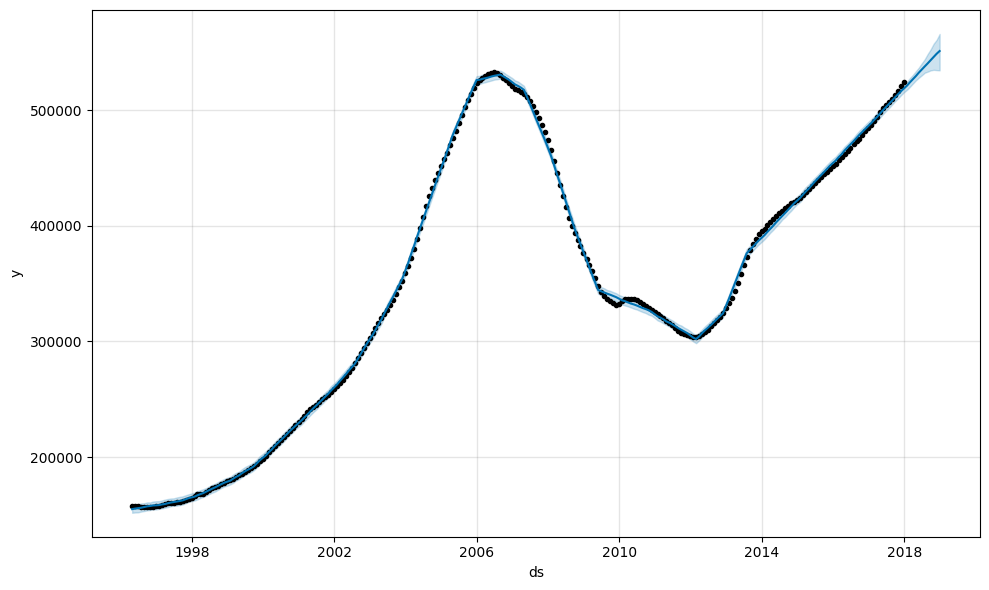

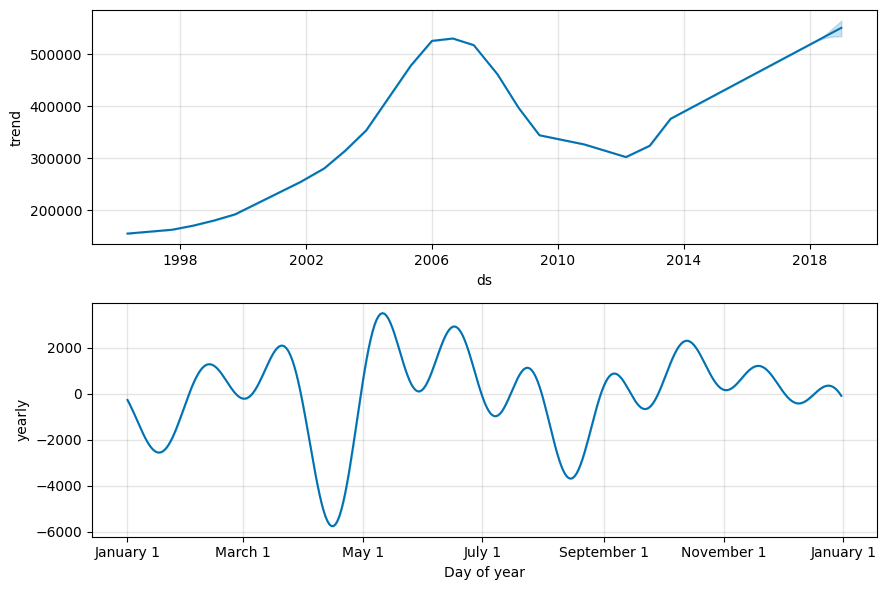

In [ ]:
fig = model_for_region.plot(forecast_region)
fig2 = model_for_region.plot_components(forecast_region)